In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lb
from scipy.fftpack import fft
from scipy.fftpack import ifft
import sounddevice as sd
from scipy.signal.windows import hann

### 1. Implementing the ADSR Envelope (0.5 points)

In [7]:
def plot_signal(t, x):
    """
    Plots the given signal x against time t.
    
    Parameters:
    - t: Time vector
    - x: Signal (either original or enveloped)
    """
    plt.figure(figsize=(10, 4))
    plt.plot(t, x)
    plt.title("Signal vs Time")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()
def plot_envelope(t_env, env):
    """
    Plots the ADSR envelope against time t_env.
    
    Parameters:
    - t_env: Time vector for the ADSR envelope
    - env: ADSR envelope values
    """
    plt.figure(figsize=(10, 4))
    plt.plot(t_env, env)
    plt.title("ADSR Envelope vs Time")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Envelope Amplitude")
    plt.grid(True)
    plt.show()
    


## Taask 1.1 : Implement the ADSR envelope function

In [ ]:
# Function to create ADSR envelope
def envelope(a, d, s, sd, r, fs):
    """
    Generates an ADSR envelope with the given parameters.
    Parameters:
    - a: Attack time in seconds
    - d: Decay time in seconds
    - s: Sustain level (0 to 1)
    - sd: Sustain time in seconds
    - r: Release time in seconds
    - fs: Sampling frequency in Hz
    
    Returns:
    - t_env: Time vector for the ADSR envelope
    - env: ADSR envelope values
    """

    # Step 1: Generate time vector for the Attack phase
    # Create a time vector 't_attack' from 0 to 'a' seconds, with step size 1/fs
    t_attack = np.arange(0, a, 1/fs)
    
    # Generate envelope 'env_attack' linearly from 0 to 1 for the attack phase
    env_attack = np.linspace(0, 1, len(t_attack))

    # Step 2: Generate time vector for the Decay phase
    # Create a time vector 't_decay' from 'a' to 'a + d' seconds, with step size 1/fs
    t_decay = np.arange(a, a+d, 1/fs)
    
    # Generate envelope 'env_decay' linearly from 1 to sustain level 's' for the decay phase
    env_decay = np.linspace(1, s, len(t_decay))

    # Step 3: Generate time vector for the Sustain phase
    # Create a time vector 't_sustain' from 'a + d' to 'a + d + sd' seconds, with step size 1/fs
    t_sustain = np.arange(a+d, a+d+sd, 1/fs)
    # Generate envelope 'env_sustain' with a constant value 's' for the sustain phase
    env_sustain = np.full(len(t_sustain), s)

    # Step 4: Generate time vector for the Release phase
    # Create a time vector 't_release' from 'a + d + sd' to 'a + d + sd + r' seconds, with step size 1/fs
    t_release = np.arange(a+d+sd, a+d+sd+r, 1/fs)
    # Generate envelope 'env_release' linearly from sustain level 's' to 0 for the release phase
    env_release = np.linspace(s, 0, len(t_release))

    # Step 5: Concatenate all parts into the final time vector and envelope
    # Concatenate the time vectors t_attack, t_decay, t_sustain, t_release into a final time vector 't_env'
    t_env = np.concatenate((t_attack, t_decay, t_sustain, t_release))
    # Concatenate the envelope parts env_attack, env_decay, env_sustain, env_release into the final envelope 'env'
    env = np.concatenate((env_attack, env_decay, env_sustain, env_release))

    # Return the final time vector and ADSR envelope
    return t_env, env


## Task 1.2 : Implement synthesized signal function

In [ ]:
# Function to generate synthesized signal x(t) using harmonics
def synthesize_signal(f0, N, fs, duration):
    """
    Synthesizes a signal using the given parameters.
    Parameters:
    - f0: Fundamental frequency of the signal
    - N: Number of harmonics
    - fs: Sampling frequency of the signal
    - duration: Duration of the signal in seconds
    
    Returns:
    - t: Time vector for the synthesized signal
    - x_t: Synthesized signal x(t)
    
    
    """

    # Step 1: Generate the time vector for the signal
    # Create a time vector 't' from 0 to 'duration' seconds, with step size 1/fs
    t = np.arange(0, duration, 1/fs)

    # Step 2: Initialize the signal as an array of zeros
    # Initialize 'x_t' with zeros having the same length as 't'
    x_t = np.zeros(len(t))


    # Step 3: For each harmonic k, generate a sine wave and add it to the signal
    
    # Loop from k = 1 to N to generate harmonics and add them to 'x_t'
    for k in range(1, N + 1):  
        # Generate the k-th harmonic frequency 'f_k'
        f_k = k*f0
        
        # Generate a random amplitude 'a_k' for the k-th harmonic
        a_k = 2*np.random.rand()-1
        # Generate a random phase 'phi_k' for the k-th harmonic
        phi_k = 2*np.pi*np.random.rand()
        # Add the k-th harmonic sine wave to the signal 'x_t'
        x_t = x_t + a_k*np.sin(2*np.pi*f_k*t + phi_k)

    # Step 4: Return the time vector and the synthesized signal
    return t, x_t



## Task 1.3: generate ADSR envelope and plot it

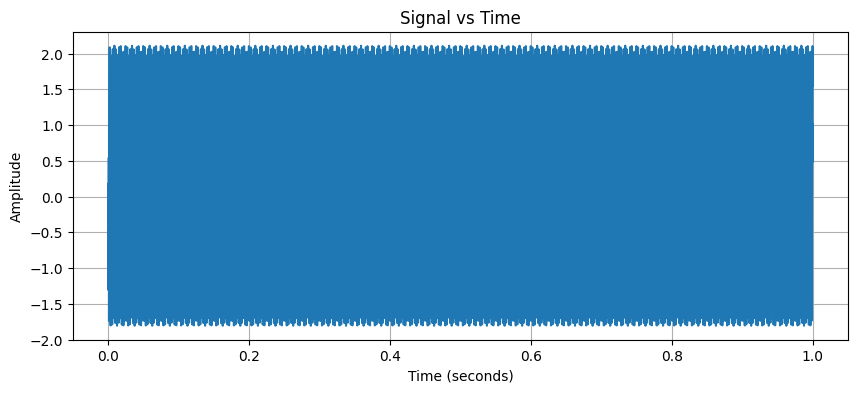

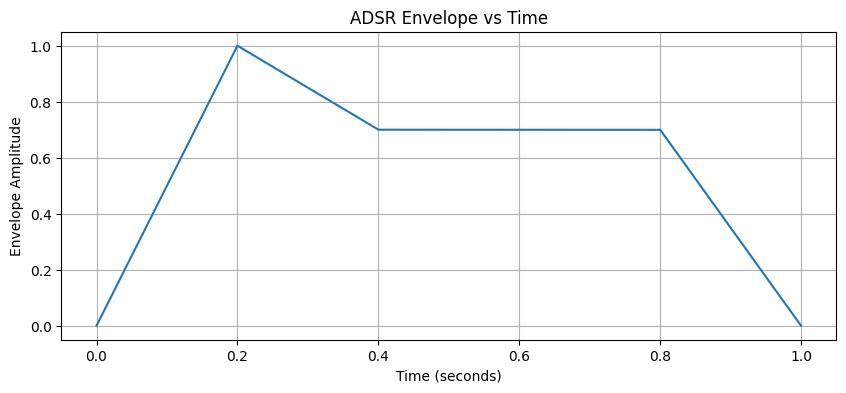

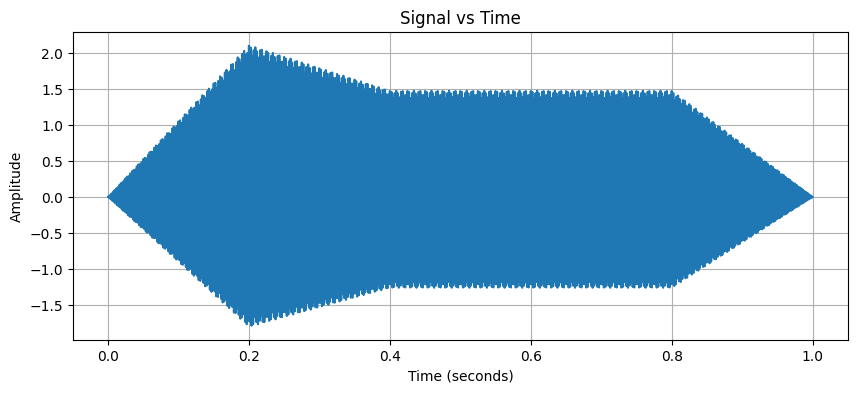

In [8]:
# Main Program to Implement ADSR and Synthesized Signal
# Step 1: Define the fundamental frequency and number of harmonics
# A4 note fundamental frequency 
f0 = 440 
# Number of harmonics to use
N = 5

# Step 2: Define the sampling frequency and duration
# Sampling frequency (samples per second)
fs = 10000
# Duration of the signal in seconds
duration = 1

# Step 3: Generate the synthesized signal x(t)
t, x = synthesize_signal(f0, N, fs, duration)

# Step 4: Define the ADSR parameters (a, d, s, sd, r)
a = 0.2  # Attack duration in seconds
d = 0.2  # Decay duration in seconds
s = 0.7  # Sustain level (0 to 1)
sd = 0.4  # Sustain duration in seconds
r = 0.2  # Release duration in seconds

# Step 5: Generate the ADSR envelope
t_env, env = envelope(a, d, s, sd, r, fs)

# Step 6: Apply the ADSR envelope to the synthesized signal
 # Multiply the original signal 'x' by the envelope 'env' to get the enveloped signal 'x_enveloped'
x_enveloped = x*env

# Step 7: Plot the original signal, ADSR envelope, and the enveloped signal
plot_signal(t, x)  # Plot the original synthesized signal
plot_envelope(t_env, env)  # Plot the ADSR envelope
plot_signal(t, x_enveloped)  # Plot the enveloped signal


#### Auxiliary functions

In [3]:
def princarg(phase_in):
    """
    Computes principle argument,  wraps phase to (-pi, pi]
    """
    phase = np.mod(phase_in + np.pi,-2*np.pi)+np.pi;
    return phase
  

def delta_phi_(Phase_current, Phase_previous, winHopAn, wLen):
    """
    Function for calculating unwrapped phase difference between consecutive frames
    
    Phase_current: current frame phase
    Phase_previous: previous frame phase
    winHopAn: Analysis hop length
    wLen: window length
    """
    
    # nominal phase increment for the analysis hop size for each bin
    omega = 2*np.pi*(winHopAn/wLen)*np.arange(0, wLen)
    delta_phi = omega + princarg(Phase_current-Phase_previous-omega)
    
    return delta_phi

### 2. Implement a time stretching algorithm using phase vocoder. (1.5 points)

In [ ]:
   
audioIn, fs = lb.load('audio.wav', sr=None)   # read audio


audioOut = np.zeros(len(audioIn))      # placeholder for reconstructed audio
wLen = int(0.032*fs)                   # window length
winAn = np.sqrt(hann(wLen, sym=False)) # analysis window
winSyn = winAn

# Analysis and Synthesis hop lengths

# Hop length or frame advance (for R = 1.4)
winHopSyn = int(0.0112*fs)

# Hop length or frame advance
winHopAn = int(0.008*fs) 

inInd = 0
# number of frames
R = winHopSyn / winHopAn

while inInd< len(audioIn)-wLen:
    # selct the frame and multiply with window function
    frame = audioIn[inInd:inInd+wLen]* winAn 
    

    # compute DFT
    f = fft(frame)
    

    # save the magnitude and phase of the DFT
    mag_f = np.abs(f)
    phi0 = np.angle(f) 

    #SPECTRAL DOMAIN PROCESSING
    # initialize variables
    if 'phi0_prev' not in locals():
        phi0_prev = phi0
        delta_phi = np.zeros(len(phi0))
    else:
        delta_phi = delta_phi_(phi0, phi0_prev, winHopAn, wLen)
        phi0_prev = phi0
        
    # accumulate
    phi0 = phi0 + delta_phi
    # unwrap
    phi0 = np.unwrap(phi0)
    # save
    phi0_prev = phi0
    

    # Recover the complex FFT
    ft = (abs(f)* np.exp(1j*phi0))
    

    # inverse DFT and windowing
    frame = np.real(ifft(ft))*winSyn

    # Ovelap add
    audioOut[inInd :inInd +wLen] =  audioOut[inInd :inInd +wLen] + frame

    # frame advance by winHopAn
    inInd = inInd + winHopAn
    

In [5]:
sd.play(audioIn, fs)

In [6]:
sd.play(audioOut, fs)

### Bonus question: Add pitch shifting